<a href="https://colab.research.google.com/github/navisabdillah/PCVK/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


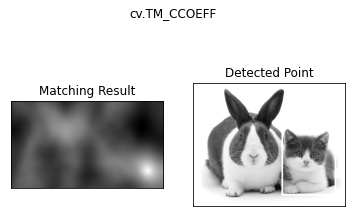

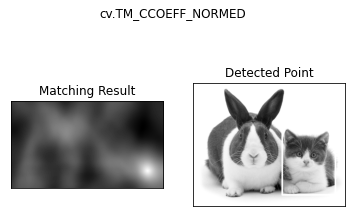

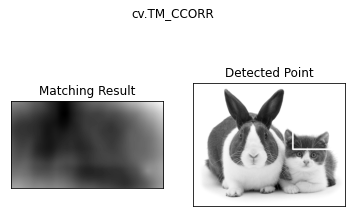

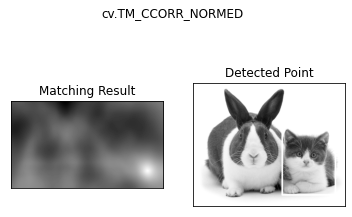

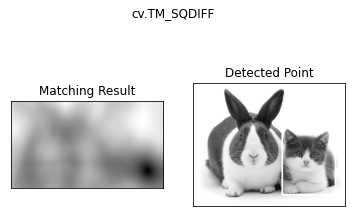

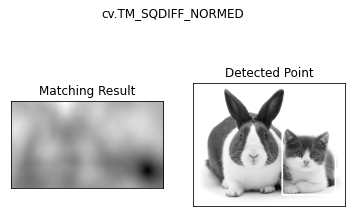

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object_Detection/cats_and_bunnies.jpg',0)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object_Detection/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 10)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

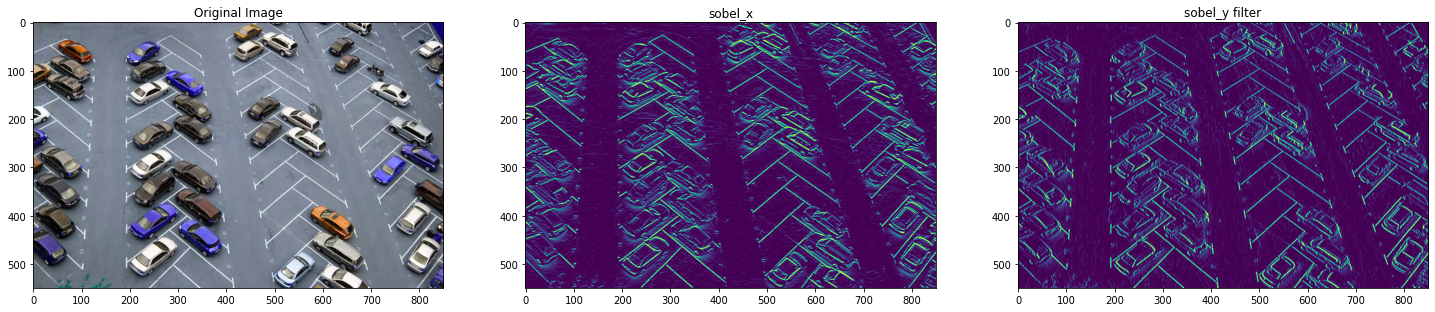

In [12]:
# 3A Sobel Edge Detection

image_ori = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object_Detection/parking-lot-cars.jpg', cv.IMREAD_COLOR)

# Convert image to gray scale
image_gray = cv.cvtColor(image_ori, cv.COLOR_BGR2GRAY)

# 3x3 Y-direction  kernel
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# 3 X 3 X-direction kernel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_y = cv.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv.filter2D(image_gray, -1, sobel_x)

(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25, 25))
ax1.title.set_text('Original Image')
ax1.imshow(image_ori)
ax2.title.set_text('sobel_x')
ax2.imshow(filtered_image_y)
ax3.title.set_text('sobel_y filter')
ax3.imshow(filtered_image_x)

plt.show()